# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [13]:
city_info = []

url = "http://api.openweathermap.org/data/2.5/weather?"
counter = 0
for city in cities[:10]:
   
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    counter=counter+1
    #print(query_url)
    
    try:
        city_num = counter
        city = response["name"]
        country = response["sys"]["country"]
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        date = response["dt"]
        maxtemp = response["main"]["temp_max"]
        windspeed = response["wind"]["speed"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]

        city_info.append([city_num, city, country, date, humidity, cloudiness, lat, lng, maxtemp, windspeed])
        print(f"Counter  {counter} {city}")
        time.sleep(.2)
    except:
        print("City not found")



City not found
Counter  2 Hermanus
Counter  3 Chengde
Counter  4 Sühbaatar
Counter  5 Busselton
Counter  6 Tommot
Counter  7 Sanok
Counter  8 Broken Hill
Counter  9 Ushuaia
Counter  10 Qaanaaq


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
city_info

[[2, 'Hermanus', 'ZA', 1619019606, 77, 69, -34.4187, 19.2345, 293.71, 2.68],
 [3, 'Chengde', 'CN', 1619019606, 43, 97, 40.9725, 117.9361, 284.92, 3.25],
 [4, 'Sühbaatar', 'MN', 1619019607, 57, 94, 50.2314, 106.2078, 271.69, 7.39],
 [5, 'Busselton', 'AU', 1619019607, 92, 63, -33.65, 115.3333, 286.48, 4.69],
 [6, 'Tommot', 'RU', 1619019608, 96, 100, 58.9564, 126.2925, 271.36, 3.58],
 [7, 'Sanok', 'PL', 1619019608, 100, 96, 49.5557, 22.2056, 282.59, 4.92],
 [8, 'Broken Hill', 'AU', 1619019609, 46, 90, -31.95, 141.4333, 284.15, 3.89],
 [9, 'Ushuaia', 'AR', 1619019609, 37, 0, -54.8, -68.3, 284.15, 1.54],
 [10, 'Qaanaaq', 'GL', 1619019595, 69, 100, 77.484, -69.3632, 261.99, 4.23]]

In [15]:
city_data_df = pd.DataFrame(city_info, columns=["city_num","city", "country", "date", "humidity", "cloudiness","lat", "long", "maxtemp", "windspeed"])
city_data_df

,city_num,city,country,date,humidity,cloudiness,lat,long,maxtemp,windspeed
0,2,Hermanus,ZA,1619019606,77,69,-34.4187,19.2345,293.71,2.68
1,3,Chengde,CN,1619019606,43,97,40.9725,117.9361,284.92,3.25
2,4,Sühbaatar,MN,1619019607,57,94,50.2314,106.2078,271.69,7.39
3,5,Busselton,AU,1619019607,92,63,-33.6500,115.3333,286.48,4.69
4,6,Tommot,RU,1619019608,96,100,58.9564,126.2925,271.36,3.58
5,7,Sanok,PL,1619019608,100,96,49.5557,22.2056,282.59,4.92
6,8,Broken Hill,AU,1619019609,46,90,-31.9500,141.4333,284.15,3.89
7,9,Ushuaia,AR,1619019609,37,0,-54.8000,-68.3000,284.15,1.54
8,10,Qaanaaq,GL,1619019595,69,100,77.4840,-69.3632,261.99,4.23


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
#  Get the indices of cities that have humidity over 100%.
# none found

In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

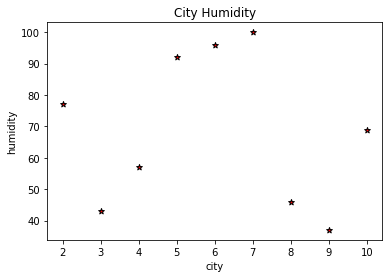

In [18]:
clean_city_data_df = city_data_df.copy()
# Generate a scatter plot of city data
x_values = clean_city_data_df['city_num']
y_values = clean_city_data_df['humidity']

plt.scatter( x_values, y_values, marker="*", facecolors="red", edgecolors="black")
plt.xlabel('city') 
plt.ylabel('humidity')
plt.title( "City Humidity")
plt.savefig("./images/city_humidity.png")
plt.show()


## Latitude vs. Temperature Plot

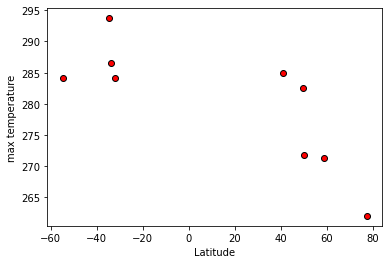

In [21]:

# Generate a scatter plot of city data
x_values = clean_city_data_df['lat']
y_values = clean_city_data_df['maxtemp']

plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('max temperature')
plt.savefig("./images/temp_lat.png")
plt.show()


## Latitude vs. Humidity Plot

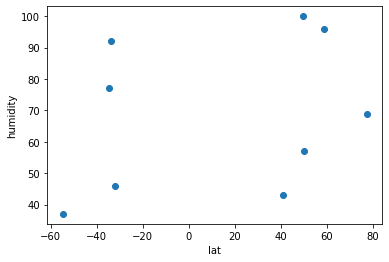

In [22]:

# Generate a scatter plot of city data
x_values = clean_city_data_df['lat']
y_values = clean_city_data_df['humidity']

plt.scatter(x_values, y_values)
plt.xlabel('lat')
plt.ylabel('humidity')
plt.savefig("./images/humidity_lat.png")
plt.show()


## Latitude vs. Cloudiness Plot

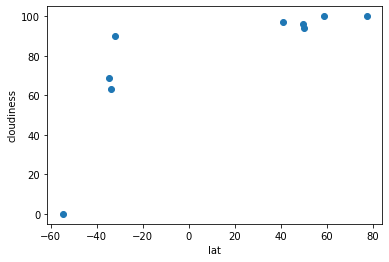

In [23]:

# Generate a scatter plot of city data
x_values = clean_city_data_df['lat']
y_values = clean_city_data_df['cloudiness']

plt.scatter(x_values, y_values)
plt.xlabel('lat')
plt.ylabel('cloudiness')
plt.savefig("./images/cloud_lat.png")

plt.show()


## Latitude vs. Wind Speed Plot

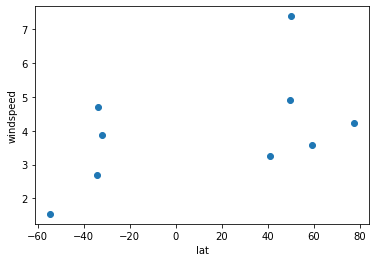

In [24]:

# Generate a scatter plot of city data
x_values = clean_city_data_df['lat']
y_values = clean_city_data_df['windspeed']

plt.scatter(x_values, y_values)
plt.xlabel('lat')
plt.ylabel('windspeed')
plt.savefig("./images/windspeed_lat.png")
plt.show()


## Linear Regression

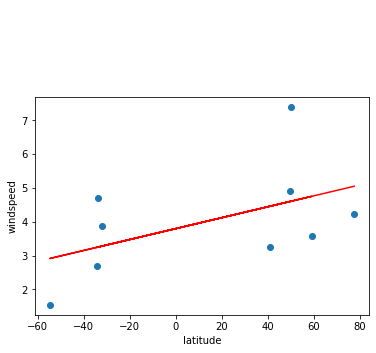

In [25]:
# plt.figure(figsize=(20,3))
# Generate a scatter plot of city data

x_values = clean_city_data_df['lat']
y_values = clean_city_data_df['windspeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('windspeed')
plt.savefig("./images/windspeed_lat_linear.png")
plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

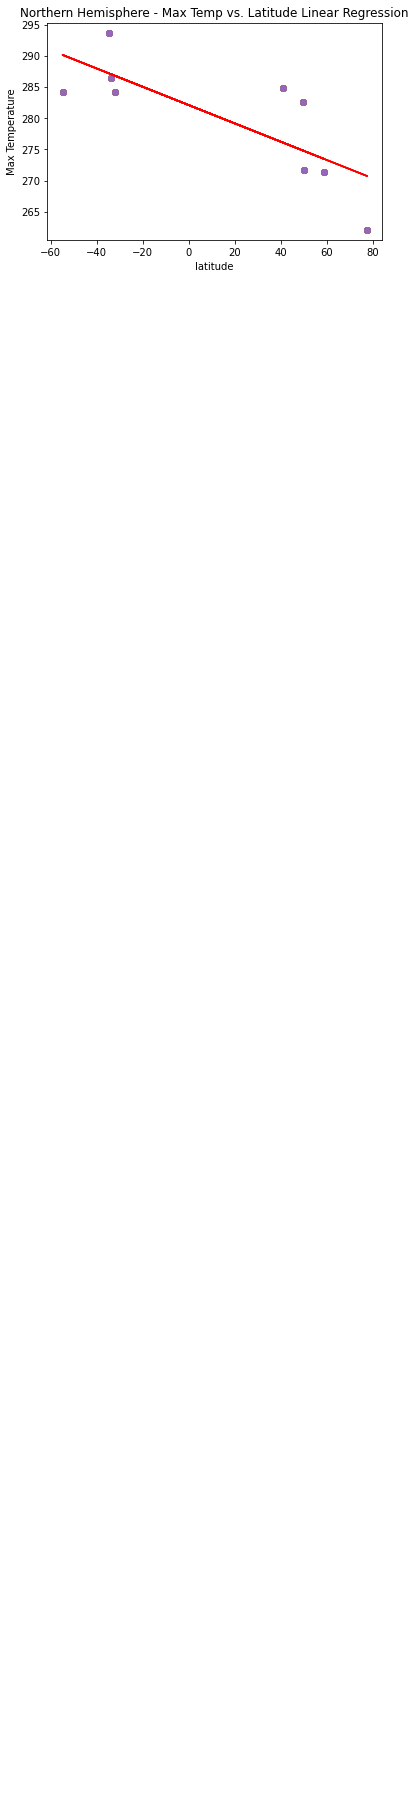

In [28]:
x_values = clean_city_data_df['lat']
for x in x_values:
    if x >= 0:
        y_values = clean_city_data_df['maxtemp']

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(6,10),fontsize=15,color="red")
        plt.xlabel('latitude')
       

plt.ylabel('Max Temperature')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("./images/maxtemp_lat_linear_N.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

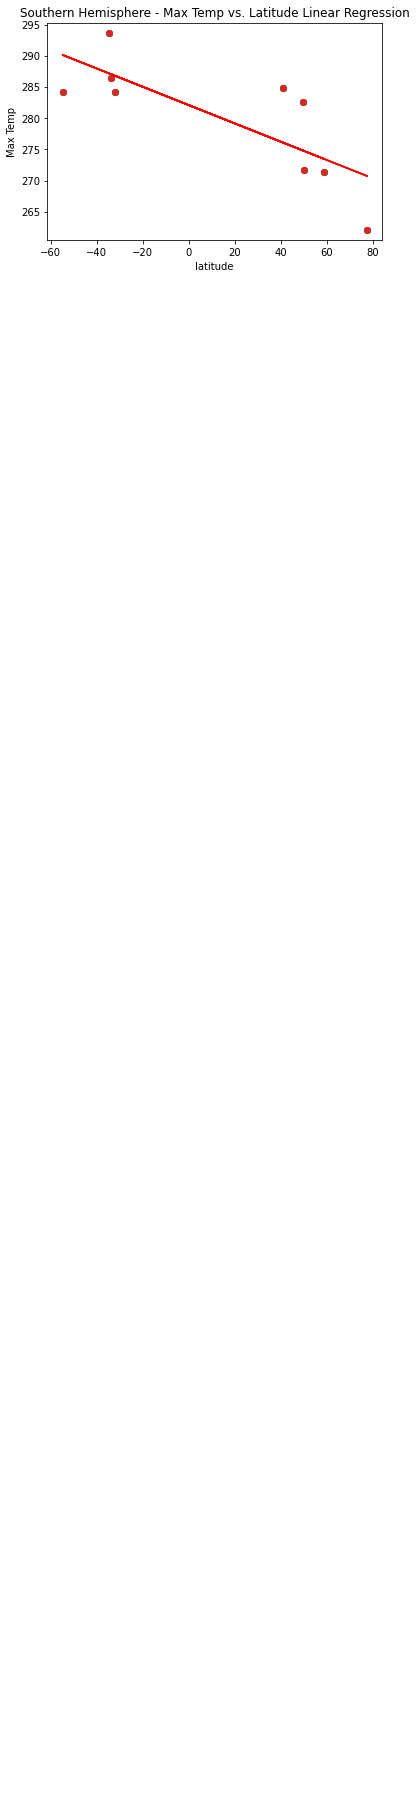

In [30]:
x_values = clean_city_data_df['lat']
y_values = clean_city_data_df['maxtemp']

# south_x = []
# south_y = []

#print(df[df[‘Name’]==’Donna’].index.values)
#index = 0
for x in x_values:
    if x < 0:
        #south_x.append(x)
        #find the location of x and print y value at that location
        #y = clean_city_data[clean_city_data['lat']==x].index.values 
        #south_y.append(y_values_1[y])

        # x_values = south_x
        # y_values = south_y

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(6,10),fontsize=15,color="red")
        
plt.xlabel('latitude')

plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("./images/maxtemp_lat_linear_S.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

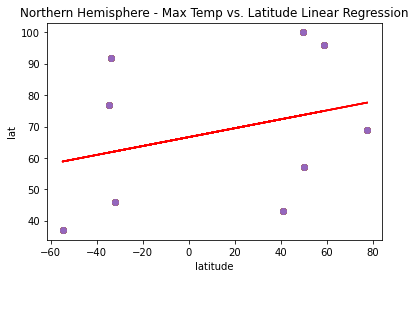

In [32]:
x_values = clean_city_data_df['lat']
x_values

for x in x_values:
    if x >= 0:
        y_values = clean_city_data_df['humidity']

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(6,10),fontsize=15,color="red")
        plt.xlabel('latitude')

plt.ylabel('lat')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("./images/humidity_lat_linear_N.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

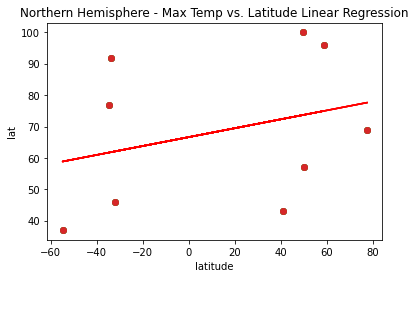

In [36]:
x_values = clean_city_data_df['lat']
x_values

for x in x_values:
    if x < 0:
        y_values = clean_city_data_df['humidity']

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(6,10),fontsize=15,color="red")
        plt.xlabel('latitude')

plt.ylabel('lat')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("./images/maxtemp_lat_linear_N.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = clean_city_data_df['lat']
x_values

for x in x_values:
    if x >= 0:
        y_values = clean_city_data_df['cloudiness']

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(6,10),fontsize=15,color="red")
        plt.xlabel('latitude')

plt.ylabel('lat')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.savefig("./images/maxtemp_lat_linear_N.png")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

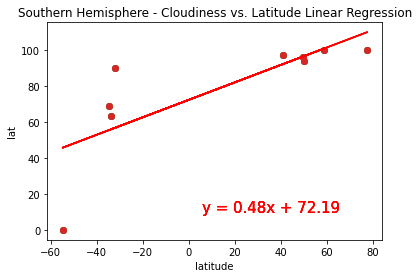

In [40]:
x_values = clean_city_data_df['lat']
x_values

for x in x_values:
    if x < 0:
        y_values = clean_city_data_df['cloudiness']

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(6,10),fontsize=15,color="red")
        plt.xlabel('latitude')

plt.ylabel('lat')
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.savefig("./images/cloudiness_lat_linear_S.png")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

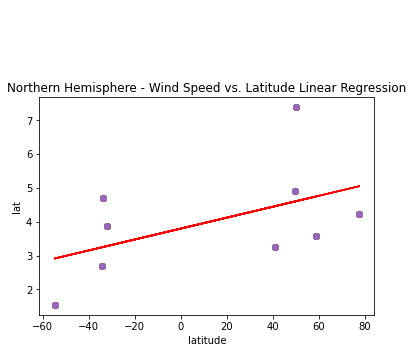

In [41]:
x_values = clean_city_data_df['lat']
x_values

for x in x_values:
    if x >= 0:
        y_values = clean_city_data_df['windspeed']

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(6,10),fontsize=15,color="red")
        plt.xlabel('latitude')

plt.ylabel('lat')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.savefig("./images/windspeed_lat_linear_N.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

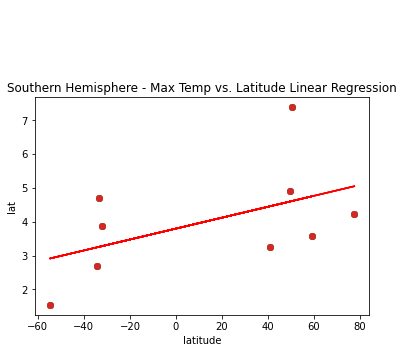

In [43]:
x_values = clean_city_data_df['lat']


for x in x_values:
    if x < 0:
        y_values = clean_city_data_df['windspeed']

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(6,10),fontsize=15,color="red")
        plt.xlabel('latitude')

plt.ylabel('lat')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("./images/windspeed_lat_linear_N.png")
plt.show()
